# NATO-Russia scenario

In [1]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.append("../src")
from main import Country, plot_static_target_map
import copy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use("https://raw.githubusercontent.com/allfed/ALLFED-matplotlib-style-sheet/main/ALLFED.mplstyle")

First we run the US, Russia, and Canada separately because they are very large countries and this may need to run on Codespace if you do not have a lot of RAM.

In [2]:
russia = Country(
    "Russia",
    landscan_year=2022,
    degrade=True,
    degrade_factor=3,
    burn_radius_prescription="default",
    kill_radius_prescription="default",
)

russia.attack_max_fatality(
    arsenal=320 * [300] + 280 * [100] + 320 * [90], include_injuries=False, non_overlapping=False
)

russia.print_diagnostic_info()

Total fatalities: 71634019 (49.6%)
Total destroyed industrial area: 32.8%
Soot emissions: 48.0 Tg


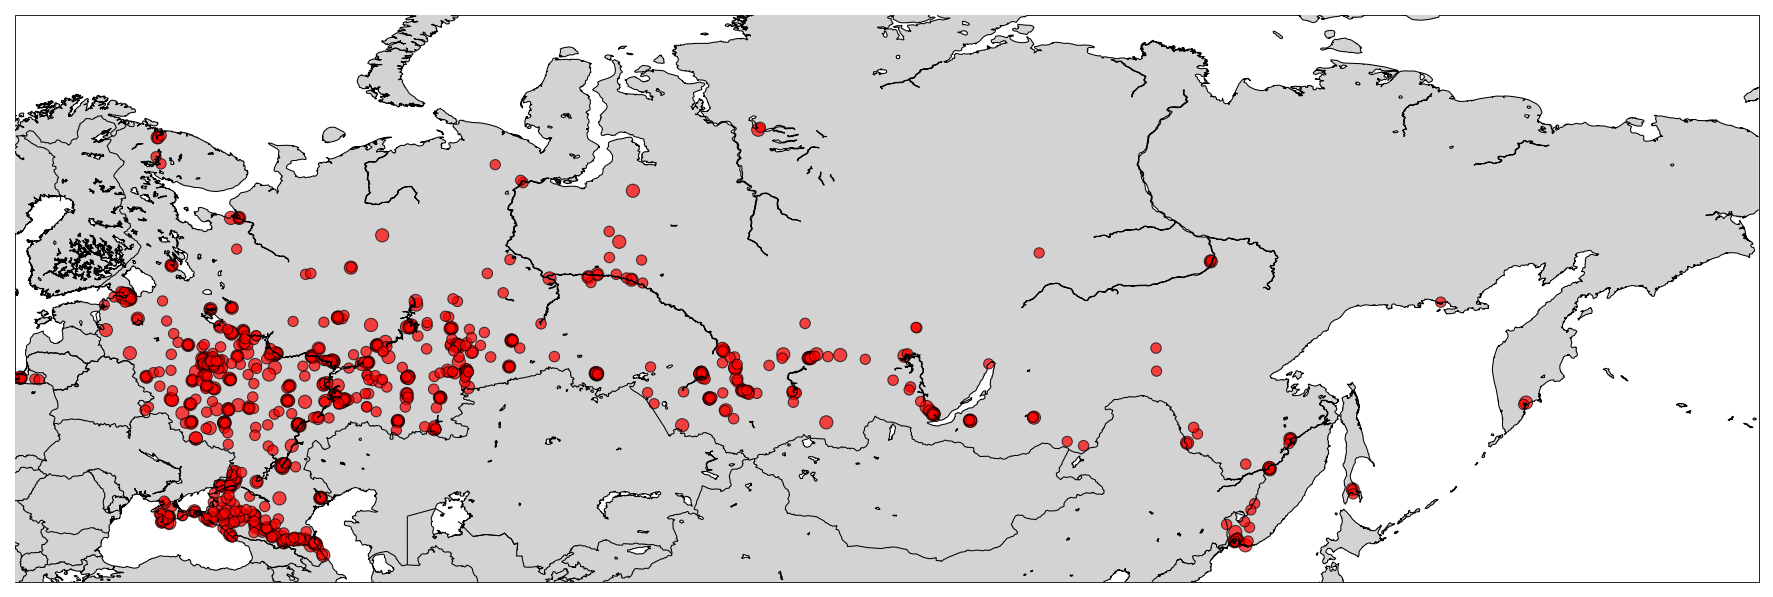

In [3]:
plot_static_target_map(
    target_list=russia.target_list,
    yields=russia.kilotonne,
    region="Russia",
)

In [2]:
US = Country(
    "United States of America",
    landscan_year=2022,
    degrade=True,
    degrade_factor=3,
    burn_radius_prescription="default",
    kill_radius_prescription="default",
    avoid_border_regions=True
)

US.attack_max_fatality(
    arsenal=413 * [100], include_injuries=False, non_overlapping=False
)

US.print_diagnostic_info()

Total fatalities: 41092211 (12.3%)
Total destroyed industrial area: 6.4%
Soot emissions: 20.3 Tg


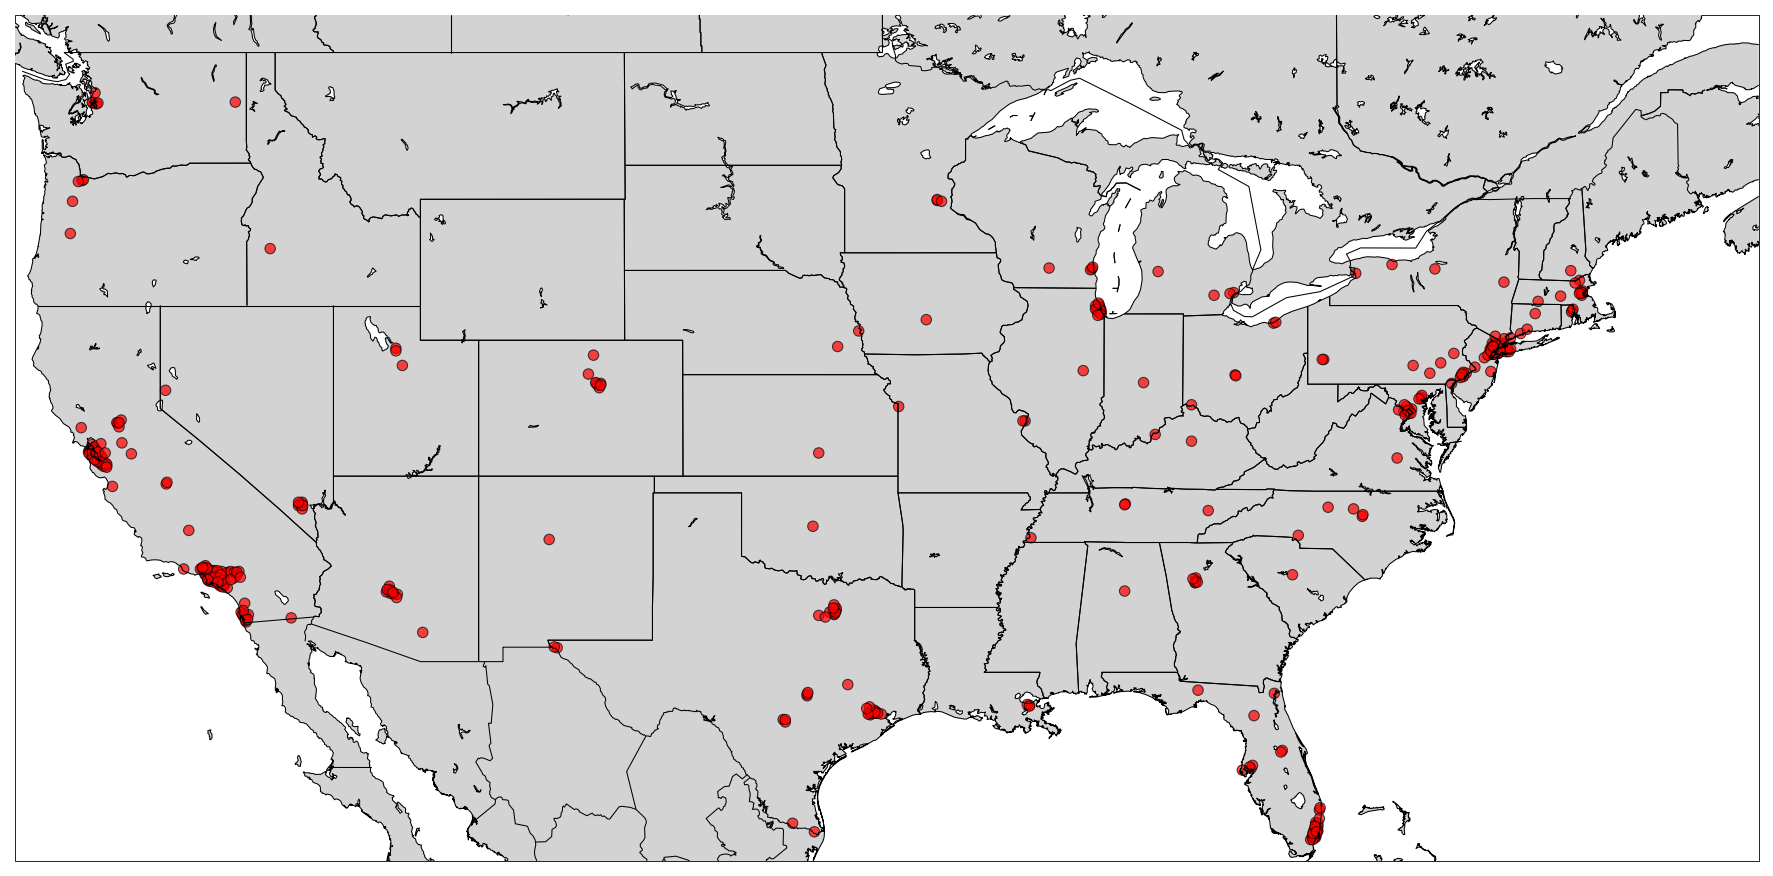

In [4]:
plot_static_target_map(
    target_list=US.target_list,
    yields=US.kilotonne,
    region="CONUS",
)

In [5]:
Canada = Country(
    "Canada",
    landscan_year=2022,
    degrade=True,
    degrade_factor=3,
    burn_radius_prescription="default",
    kill_radius_prescription="default",
    avoid_border_regions=True
)

Canada.attack_max_fatality(
    arsenal=48 * [100], include_injuries=False, non_overlapping=False
)

Canada.print_diagnostic_info()

Total fatalities: 5578306 (15.1%)
Total destroyed industrial area: 7.5%
Soot emissions: 2.7 Tg


In [6]:
Canada.plot(show_burn_regions=False, show_industrial_areas=False, show_custom_locations=False, ms=10)

Now we can run the rest of the countries.

In [2]:
europe = {
    "Albania": 3,
    "Belgium": 14,
    "Bulgaria": 8,
    "Croatia": 5,
    "Czech Republic": 13,
    "Denmark": 7,
    "Estonia": 2,
    "Finland": 7,
    "France": 84,
    "Germany": 103,
    "Greece": 13,
    "Hungary": 12,
    "Italy": 73,
    "Latvia": 2,
    "Lithuania": 3,
    "Luxembourg": 1,
    "Montenegro": 1,
    "Netherlands": 22,
    "North Macedonia": 3,
    "Norway": 7,
    "Poland": 47,
    "Portugal": 13,
    "Romania": 24,
    "Slovakia": 7,
    "Slovenia": 3,
    "Spain": 59,
    "Sweden": 13,
    "Turkey": 106,
    "United Kingdom": 84,
}

In [4]:
for country, arsenal in europe.items():
    country_obj = Country(
        country,
        landscan_year=2022,
        degrade=True,
        degrade_factor=3,
        burn_radius_prescription="default",
        kill_radius_prescription="default",
        avoid_border_regions=True,
    )

    fatalities = country_obj.attack_max_fatality(
        arsenal=arsenal * [100], include_injuries=False, non_overlapping=False
    )

    fatalities, _, _ = country_obj.get_total_fatalities()
    soot_emission = (
        country_obj.soot_Tg
    ) 
    industry_destroyed = country_obj.get_total_destroyed_industrial_area() * 100
    print(
        f"{country}: {fatalities / 1e6:.2f}, {soot_emission:.2f}, {industry_destroyed:.2f}"
    )
    continue

Albania: 0.52, 0.10, 6.62
Belgium: 1.82, 0.41, 7.60
Bulgaria: 1.17, 0.22, 11.93
Croatia: 0.54, 0.10, 5.73
Czech Republic: 1.26, 0.26, 8.16
Denmark: 0.80, 0.17, 5.59
Estonia: 0.18, 0.03, 7.60
Finland: 0.64, 0.10, 3.90
France: 11.78, 2.78, 8.06
Germany: 12.56, 2.23, 10.24
Greece: 2.73, 0.59, 15.61
Hungary: 1.37, 0.25, 6.36
Italy: 9.51, 2.18, 10.29
Latvia: 0.27, 0.04, 8.17
Lithuania: 0.31, 0.05, 2.44
Luxembourg: 0.09, 0.01, 4.34
Montenegro: 0.08, 0.01, 13.11
Netherlands: 2.57, 0.41, 12.70
North Macedonia: 0.37, 0.07, 27.73
Norway: 0.61, 0.12, 7.54
Poland: 5.40, 0.91, 12.83
Portugal: 1.54, 0.31, 8.32
Romania: 3.09, 0.62, 12.22
Slovakia: 0.49, 0.05, 8.20
Slovenia: 0.22, 0.03, 8.40
Spain: 9.41, 2.13, 13.43
Sweden: 1.37, 0.29, 3.71
Turkey: 22.44, 6.07, 23.83
United Kingdom: 12.33, 2.48, 15.61


In [3]:
country_obj = Country(
    "Turkey",
    landscan_year=2022,
    degrade=True,
    degrade_factor=3,
    burn_radius_prescription="default",
    kill_radius_prescription="default",
    avoid_border_regions=True
)

country_obj.attack_max_fatality(
    arsenal=106 * [100], include_injuries=False, non_overlapping=False
)

country_obj.print_diagnostic_info()

Total fatalities: 22437259 (27.6%), of which 0.0% are from radiation fallout
Total destroyed industrial area: 23.8%
Soot emissions: 6.1 Tg


In [14]:
country_obj.plot(show_burn_regions=False, show_industrial_areas=True, show_custom_locations=False, ms=10)